In [2]:
# !pip install autograd
import pandas as pd
import autograd.numpy as np
from autograd import grad 

In [3]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

In [4]:
genre_histograms = {
    "edm":       np.asarray([1, 0, 0, 0, 0, 0, 0]),
    "hiphop":    np.asarray([0, 1, 0, 0, 0, 0, 0]),
    "classical": np.asarray([0, 0, 1, 0, 0, 0, 0]),
    "jazz":      np.asarray([0, 0, 0, 1, 0, 0, 0]),
    "pop":       np.asarray([0, 0, 0, 0, 1, 0, 0]),
    "country":   np.asarray([0, 0, 0, 0, 0, 1, 0]),
    "rock":      np.asarray([0, 0, 0, 0, 0, 0, 1])
}

In [175]:
# Split test and training into x and y values
x_train = train_df[attribute_names]
y_train = train_df["Class"]
x_test = test_df[attribute_names]
y_test = test_df["Class"]

x = x_train
y = y_train
x = x.values
y = y.values

[Jerm Watt Github Code Reference](https://github.com/jermwatt/mlrefined/blob/cfda70dacd14a5010a4a71a41b46f3a1ac9f1774/mlrefined_libraries/superlearn_library/cost_viewer_entropy.py)

In [203]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
 
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

# look at chapter 6, page 10
y_encoded = np.array([genre_histograms[genre] for genre in y])
epsilon = 1e-5
def cross_entropy(w):
    c = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]
        a_p = sigmoid(model(x_p, w))
        
        c -= np.sum(y_p*np.log(a_p) + (1-y_p)*np.log(1 - a_p))
    return c/y.size 

In [212]:
def cross_entropy2(w):
    cost = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]
        a_p = sigmoid(model(x_p, w))
        
        ind = np.argwhere(y_p == 0)
        cost = -np.sum(np.log(1 - a_p[ind] + epsilon))

        ind = np.argwhere(y_p == 1)
        cost -= np.sum(np.log(a_p[ind] + epsilon))
    print(cost)
    return cost/y.size


In [195]:
def entropy(w):
    cost = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]

        output = sigmoid(model(x_p, w))
        # print(output)

        difference = y_p - output
        cost += np.sum(np.abs(difference))

    return cost / np.size(y)

In [13]:
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


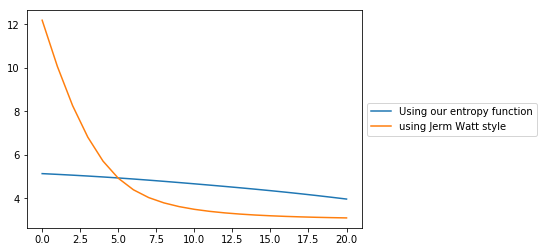

In [205]:
g = entropy
w = 0.00001 * np.random.rand(14, 7)
learning_rate = 10**(-11)
max_its = 20

weight_history1, cost_history1 = gradient_descent(entropy, learning_rate, max_its, w)
weight_history2, cost_history2 = gradient_descent(cross_entropy, learning_rate, max_its, w)

plot_cost_histories(cost_histories=[cost_history1, cost_history2], 
                    labels=["Using our entropy function", "using Jerm Watt style"])


69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autograd ArrayBox with value 69.07754278987137
69.07754278987137
Autogra

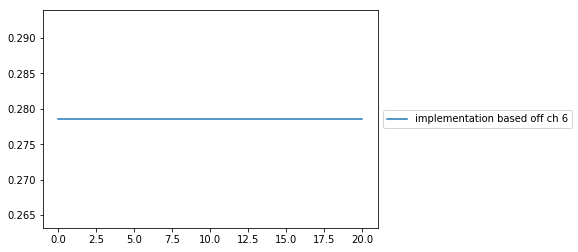

In [216]:
w = 0.001 * np.random.rand(14, 7)
learning_rate = 10**(-5)
max_its = 20

weight_history3, cost_history3 = gradient_descent(cross_entropy2, learning_rate, max_its, w)

plot_cost_histories(cost_histories=[cost_history3], 
                    labels=["implementation based off ch 6"])


In [211]:
cost_history3

[0.27853846286841427,
 0.2785384628652806,
 0.27853846286205736,
 0.27853846285883416,
 0.27853846285570044,
 0.27853846285247724,
 0.278538462849254,
 0.27853846284603084,
 0.2785384628428971,
 0.27853846283967393,
 0.27853846283645073,
 0.2785384628332275,
 0.2785384628300043,
 0.278538462826781,
 0.27853846282364736,
 0.27853846282042416,
 0.27853846281720096,
 0.27853846281397776,
 0.2785384628107545,
 0.2785384628075313,
 0.2785384628043081]